In [ ]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

df = pd.read_csv('../all_var_int.csv')
df.describe()

,FID_Key,state_code,district_code,block_code,objectid,stcode11,drought_frq,storm_freq,flood_freq,rural_pop,...,total_reg_workers,women_reg_workers,num_of_active_job_cards,num_joint_acc_of_women,num_total_acc_of_women,num_women_beneficiary_worker_with_acc,num_women_beneficiary_active_worker_with_acc,tot_expenditure,tot_mandays,gw_stge_of_extraction
count,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5.815000e+03,...,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5.815000e+03,5175.000000
mean,3744.730181,19.342218,362.509028,3424.578504,3459.751849,19.834910,3.081169,11.045572,22.271883,4.268809e+06,...,41076.712468,19873.782287,12602.858469,2408.266724,16449.579536,15557.887360,10773.214961,4319.087704,6.884994e+07,-456.060553
std,1998.031178,9.939108,195.339992,1951.511798,2106.574036,10.560126,2.103926,9.441698,14.123303,3.745933e+06,...,34379.827770,16262.322561,9007.231548,5387.560594,13534.272569,12013.081666,9030.064504,4116.178693,7.488405e+07,6975.643425
min,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-100000.000000
25%,1976.500000,9.000000,192.000000,1709.500000,1566.500000,9.000000,2.000000,3.000000,13.000000,1.569976e+06,...,19194.500000,9094.000000,6537.000000,120.000000,7428.500000,7527.000000,4787.000000,1477.500000,2.053185e+07,32.974058
50%,3670.000000,20.000000,356.000000,3408.000000,3289.000000,20.000000,3.000000,7.000000,21.000000,3.293788e+06,...,30669.000000,15226.000000,10218.000000,551.000000,12281.000000,12078.000000,8107.000000,3172.000000,4.624726e+07,56.728903
75%,5519.500000,27.000000,517.000000,5085.500000,5394.500000,27.000000,5.000000,20.000000,32.000000,6.076031e+06,...,51225.500000,25712.000000,16414.000000,2025.500000,21535.000000,20399.000000,13925.500000,5798.500000,9.129770e+07,76.093358
max,7133.000000,38.000000,734.000000,7417.000000,7136.000000,39.000000,8.000000,38.000000,60.000000,3.173207e+07,...,359381.000000,158219.000000,78340.000000,75184.000000,120982.000000,97587.000000,82105.000000,55644.000000,1.021685e+09,474.955968


In [2]:
storm_incidence = ['storm_freq']
Rainfall_Associated_Flooding = ['rainfall2020', 'lpa_total_rainfall', 'coef_variation', 'aridity']
Topography_and_Soil = ['rugged', 'elev_mean','bdod', 'cec', 'cfvo', 'clay', 'sand', 'silt', 'phh_20', 'soc', 'ocd', 'ocs','crp_sq_km']
forest_cover= ['fcover_sq_km', 'forest_gain_total', 'floss_total']
common_cols = ["state_code", "state_name", "district_code", "district_name", "block_code", "block_name", "stcode11", "dtcode11", "blkcode11", "FID_Key", "total_villages", "total_vill_survey_completed", "geog_area"]

cyclone_df = df[common_cols+storm_incidence+Topography_and_Soil+forest_cover]
cyclone_df.loc[df['total_villages'].isna(), 'total_villages'] = 74
cyclone_df.describe()

,state_code,district_code,block_code,stcode11,FID_Key,total_villages,total_vill_survey_completed,geog_area,storm_freq,rugged,...,sand,silt,phh_20,soc,ocd,ocs,crp_sq_km,fcover_sq_km,forest_gain_total,floss_total
count,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,...,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5.815000e+03,5.815000e+03
mean,19.342218,362.509028,3424.578504,19.834910,3744.730181,102.652107,99.810834,454.322948,11.045572,0.025062,...,310.142598,327.376596,68.124351,80.378627,99.887123,39.782061,247.157626,1.036420,1.245658e+05,3.228677e+06
std,9.939108,195.339992,1951.511798,10.560126,1998.031178,81.606942,77.065167,489.330007,9.441698,0.085418,...,72.849535,61.008968,6.856870,46.280544,17.640445,9.577793,245.050447,2.083876,5.523142e+05,1.555368e+07
min,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,1.000000,1.983090,0.000000,0.000000,...,38.138640,145.655985,49.311965,25.237709,63.879354,16.115862,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,9.000000,192.000000,1709.500000,9.000000,1976.500000,41.000000,41.000000,190.555410,3.000000,0.000000,...,272.206447,282.566440,64.846492,51.639478,88.323687,32.903401,95.492200,0.045454,1.800000e+02,7.650165e+03
50%,20.000000,356.000000,3408.000000,20.000000,3670.000000,86.000000,85.000000,302.429490,7.000000,0.000016,...,315.795187,323.581214,69.858948,66.355794,96.880422,39.106434,176.686000,0.196782,2.763765e+03,4.894486e+04
75%,27.000000,517.000000,5085.500000,27.000000,5519.500000,141.000000,137.000000,572.599785,20.000000,0.005348,...,354.753863,368.393407,72.528968,90.843798,104.536160,44.494762,303.594150,1.034080,2.491688e+04,4.014188e+05
max,38.000000,734.000000,7417.000000,39.000000,7133.000000,734.000000,663.000000,16972.130590,38.000000,0.644697,...,629.746447,612.545306,88.590270,512.910903,222.022184,76.376847,2068.329300,29.400000,1.518430e+07,2.970733e+08


In [3]:
storm_hazard_df = cyclone_df[['block_code','storm_freq','elev_mean']]

storm_hazard_df.describe()


,block_code,storm_freq,elev_mean
count,5815.000000,5815.000000,5815.000000
mean,3424.578504,11.045572,318.668665
std,1951.511798,9.441698,450.119627
min,2.000000,0.000000,1.394637
25%,1709.500000,3.000000,75.009878
50%,3408.000000,7.000000,192.793133
75%,5085.500000,20.000000,396.802207
max,7417.000000,38.000000,4710.546365


In [4]:
scaler = MinMaxScaler()

# Fit and transform the data
storm_hazard_df[['storm_freq', 'elev_mean']] = scaler.fit_transform(storm_hazard_df[['storm_freq', 'elev_mean']])

storm_hazard_df.describe()

/var/folders/cd/prkj0t8j32v902v1n0cr3s6h0000gn/T/ipykernel_19597/567622624.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  storm_hazard_df[['storm_freq', 'elev_mean']] = scaler.fit_transform(storm_hazard_df[['storm_freq', 'elev_mean']])


,block_code,storm_freq,elev_mean
count,5815.000000,5815.000000,5815.000000
mean,3424.578504,0.290673,0.067374
std,1951.511798,0.248466,0.095584
min,2.000000,0.000000,0.000000
25%,1709.500000,0.078947,0.015632
50%,3408.000000,0.184211,0.040644
75%,5085.500000,0.526316,0.083966
max,7417.000000,1.000000,1.000000


In [5]:
storm_hazard_df['elev_mean'] = 1 - storm_hazard_df['elev_mean']

cyclone_df['cyclone_hazard_scr'] = storm_hazard_df['storm_freq'] * storm_hazard_df['elev_mean']

cyclone_df.describe()

/var/folders/cd/prkj0t8j32v902v1n0cr3s6h0000gn/T/ipykernel_19597/3091485406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  storm_hazard_df['elev_mean'] = 1 - storm_hazard_df['elev_mean']
/var/folders/cd/prkj0t8j32v902v1n0cr3s6h0000gn/T/ipykernel_19597/3091485406.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cyclone_df['cyclone_hazard_scr'] = storm_hazard_df['storm_freq'] * storm_hazard_df['elev_mean']


,state_code,district_code,block_code,stcode11,FID_Key,total_villages,total_vill_survey_completed,geog_area,storm_freq,rugged,...,silt,phh_20,soc,ocd,ocs,crp_sq_km,fcover_sq_km,forest_gain_total,floss_total,cyclone_hazard_scr
count,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,...,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5.815000e+03,5.815000e+03,5815.000000
mean,19.342218,362.509028,3424.578504,19.834910,3744.730181,102.652107,99.810834,454.322948,11.045572,0.025062,...,327.376596,68.124351,80.378627,99.887123,39.782061,247.157626,1.036420,1.245658e+05,3.228677e+06,0.278848
std,9.939108,195.339992,1951.511798,10.560126,1998.031178,81.606942,77.065167,489.330007,9.441698,0.085418,...,61.008968,6.856870,46.280544,17.640445,9.577793,245.050447,2.083876,5.523142e+05,1.555368e+07,0.243623
min,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,1.000000,1.983090,0.000000,0.000000,...,145.655985,49.311965,25.237709,63.879354,16.115862,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,9.000000,192.000000,1709.500000,9.000000,1976.500000,41.000000,41.000000,190.555410,3.000000,0.000000,...,282.566440,64.846492,51.639478,88.323687,32.903401,95.492200,0.045454,1.800000e+02,7.650165e+03,0.074235
50%,20.000000,356.000000,3408.000000,20.000000,3670.000000,86.000000,85.000000,302.429490,7.000000,0.000016,...,323.581214,69.858948,66.355794,96.880422,39.106434,176.686000,0.196782,2.763765e+03,4.894486e+04,0.164599
75%,27.000000,517.000000,5085.500000,27.000000,5519.500000,141.000000,137.000000,572.599785,20.000000,0.005348,...,368.393407,72.528968,90.843798,104.536160,44.494762,303.594150,1.034080,2.491688e+04,4.014188e+05,0.523116
max,38.000000,734.000000,7417.000000,39.000000,7133.000000,734.000000,663.000000,16972.130590,38.000000,0.644697,...,612.545306,88.590270,512.910903,222.022184,76.376847,2068.329300,29.400000,1.518430e+07,2.970733e+08,0.999508


In [6]:
cyclone_df['floss_ratio'] = cyclone_df['floss_total']/cyclone_df['geog_area']
cyclone_df['forest_gain_ratio'] = cyclone_df['forest_gain_total']/cyclone_df['geog_area']
cyclone_df['crp_ratio'] = cyclone_df['crp_sq_km']/cyclone_df['geog_area']
cyclone_df['fcover_ratio'] = cyclone_df['fcover_sq_km']/cyclone_df['geog_area']

cyclone_df.drop(columns=['floss_total', 'forest_gain_total', 'crp_sq_km', 'fcover_sq_km'], inplace=True)


/var/folders/cd/prkj0t8j32v902v1n0cr3s6h0000gn/T/ipykernel_19597/1016755592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cyclone_df['floss_ratio'] = cyclone_df['floss_total']/cyclone_df['geog_area']
/var/folders/cd/prkj0t8j32v902v1n0cr3s6h0000gn/T/ipykernel_19597/1016755592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cyclone_df['forest_gain_ratio'] = cyclone_df['forest_gain_total']/cyclone_df['geog_area']
/var/folders/cd/prkj0t8j32v902v1n0cr3s6h0000gn/T/ipykernel_19597/1016755592.py:3: Settin

In [7]:
cyclone_df.columns

Index(['state_code', 'state_name', 'district_code', 'district_name',
       'block_code', 'block_name', 'stcode11', 'dtcode11', 'blkcode11',
       'FID_Key', 'total_villages', 'total_vill_survey_completed', 'geog_area',
       'storm_freq', 'rugged', 'elev_mean', 'bdod', 'cec', 'cfvo', 'clay',
       'sand', 'silt', 'phh_20', 'soc', 'ocd', 'ocs', 'cyclone_hazard_scr',
       'floss_ratio', 'forest_gain_ratio', 'crp_ratio', 'fcover_ratio'],
      dtype='object')

In [8]:
cyclone_df[['floss_ratio', 'forest_gain_ratio', 'crp_ratio', 'fcover_ratio']].describe()

,floss_ratio,forest_gain_ratio,crp_ratio,fcover_ratio
count,5815.000000,5815.000000,5815.000000,5815.000000
mean,6755.804860,228.467190,0.603241,0.002040
std,28699.880180,686.855661,0.293327,0.002622
min,0.000000,0.000000,0.000000,0.000000
25%,25.196245,0.508770,0.395590,0.000165
50%,181.052863,10.392794,0.692756,0.000773
75%,1243.324904,93.987177,0.848424,0.003009
max,445978.177939,9462.237323,1.017120,0.010876


In [9]:
Rscaler = RobustScaler()

df_scaled = cyclone_df.copy()

cols=['storm_freq', 'rugged', 'elev_mean', 'bdod', 'cec', 'cfvo', 'clay',
       'sand', 'silt', 'phh_20', 'soc', 'ocd', 'ocs','floss_ratio', 'forest_gain_ratio', 'crp_ratio', 'fcover_ratio']

df_scaled[cols] = Rscaler.fit_transform(df_scaled[cols])

In [10]:
df_scaled.isna().sum()

state_code                     0
state_name                     0
district_code                  0
district_name                  0
block_code                     0
block_name                     0
stcode11                       0
dtcode11                       0
blkcode11                      0
FID_Key                        0
total_villages                 0
total_vill_survey_completed    0
geog_area                      0
storm_freq                     0
rugged                         0
elev_mean                      0
bdod                           0
cec                            0
cfvo                           0
clay                           0
sand                           0
silt                           0
phh_20                         0
soc                            0
ocd                            0
ocs                            0
cyclone_hazard_scr             0
floss_ratio                    0
forest_gain_ratio              0
crp_ratio                      0
fcover_rat

In [11]:
df_scaled.columns

Index(['state_code', 'state_name', 'district_code', 'district_name',
       'block_code', 'block_name', 'stcode11', 'dtcode11', 'blkcode11',
       'FID_Key', 'total_villages', 'total_vill_survey_completed', 'geog_area',
       'storm_freq', 'rugged', 'elev_mean', 'bdod', 'cec', 'cfvo', 'clay',
       'sand', 'silt', 'phh_20', 'soc', 'ocd', 'ocs', 'cyclone_hazard_scr',
       'floss_ratio', 'forest_gain_ratio', 'crp_ratio', 'fcover_ratio'],
      dtype='object')

In [12]:
df_pca = df_scaled.drop(columns=['state_code', 'state_name', 'district_code', 'district_name',
       'block_code', 'block_name', 'stcode11', 'dtcode11', 'blkcode11',
       'FID_Key', 'total_villages', 'total_vill_survey_completed', 'geog_area'],errors='ignore')
df_pca.replace('', np.nan, inplace=True)
df_pca = df_pca.astype(float)

In [13]:
pca = PCA()
pca.fit(df_pca)

PCA()

In [14]:
pcaSummary_df = pd.DataFrame({
            '% variance': pca.explained_variance_ratio_,
            'Cumulative %': np.cumsum(pca.explained_variance_ratio_)
             })
# round(3) function rounds to 3 decimals
pcaSummary_df.round(3)

,% variance,Cumulative %
0,0.674,0.674
1,0.262,0.936
2,0.056,0.991
3,0.003,0.994
4,0.002,0.996
5,0.001,0.997
6,0.001,0.998
7,0.001,0.999
8,0.000,0.999
9,0.000,0.999


In [15]:
PCA_weights = pcaSummary_df['% variance'][:3]

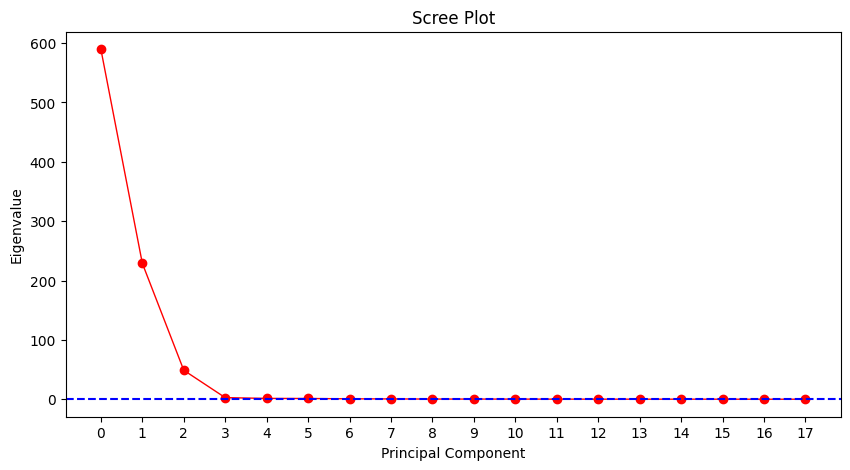

In [16]:

# scree plot of eigenvalues
# define the x values, i.e., components
#Eigenvalues are given by the PCA explained_variance_ method
eig = pca.explained_variance_.round(2) #explained variance method

xvals = np.arange(df_pca.shape[1]);
#figure size
plt.figure(figsize=(10,5))
#plot in red color
plt.plot(xvals, eig, 'ro-', linewidth=1)
#set ticks to every unit
plt.xticks(xvals)

#add labels...
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

#add a horizontal line in blue for latent root criterion
plt.axhline(y=1, color='b', linestyle='--')

#look for inflection point --> 2 is the major inflection point 
# philip said keep points before this --> that is 2 

In [17]:
# Fit PCA for all components (you already have this)
pca = PCA(n_components=3)
pca.fit(df_pca)

# Extract loadings (weights of variables for each PC)
loadings = pd.DataFrame(
    pca.components_.T,  # Transpose to align variables with components
    columns=[f"PC{i+1}" for i in range(3)],  # Name components as PC1, PC2, ...
    index=df_pca.columns  # Original variable names
)

# Display loadings
print(loadings)

                         PC1       PC2       PC3
storm_freq         -0.004228 -0.005270 -0.006386
rugged              0.290943  0.945019 -0.114884
elev_mean           0.014600  0.070722  0.001621
bdod               -0.014476 -0.014186 -0.009715
cec                -0.004485 -0.001909  0.001403
cfvo                0.008124  0.013815  0.009533
clay               -0.000234 -0.008886  0.008106
sand                0.002097  0.006485 -0.012312
silt               -0.001787  0.002503  0.003867
phh_20             -0.018506 -0.010726 -0.026454
soc                 0.013475  0.032358  0.010678
ocd                 0.011418  0.027398  0.014012
ocs                 0.015629  0.020695  0.013510
cyclone_hazard_scr -0.001894 -0.002648 -0.002806
floss_ratio         0.951847 -0.300411 -0.056205
forest_gain_ratio   0.085467  0.089841  0.989969
crp_ratio          -0.011976 -0.015523 -0.019835
fcover_ratio        0.021320  0.021903  0.039340


In [18]:
# Add PCA scores to the DataFrame with renamed components
pca_scores = pca.transform(df_pca)

# Assign PCA scores to their respective components
for i, name in enumerate(loadings.columns):
    df_scaled[f"Cyclone_Exposure_{name}"] = pca_scores[:, i]

# Check the updated DataFrame
print(df_scaled.head())

   state_code                   state_name  district_code  \
0          35  Andaman And Nicobar Islands            603   
1          35  Andaman And Nicobar Islands            632   
2          28               Andhra Pradesh            502   
3          28               Andhra Pradesh            502   
4          28               Andhra Pradesh            502   

              district_name  block_code    block_name  stcode11 dtcode11  \
0                  Nicobars        6498  Campbell Bay        35            
1  North And Middle Andaman        6492      Diglipur        35            
2             Ananthapuramu        4689     Anantapur        37      553   
3             Ananthapuramu        4690       Atmakur        37      553   
4             Ananthapuramu        4692     Beluguppa        37      553   

  blkcode11  FID_Key  ...       ocd       ocs  cyclone_hazard_scr  \
0         3        1  ...  1.042888  1.584410            0.000000   
1         4        4  ...  3.046686  1

In [19]:
# Multiply each PCA component score by its weight
df["Cyclone_Exposure_Index"] = (
    PCA_weights[0] * df_scaled["Cyclone_Exposure_PC1"] +
    PCA_weights[1] * df_scaled["Cyclone_Exposure_PC2"] +
    PCA_weights[2] * df_scaled["Cyclone_Exposure_PC3"] 
)

# Display the flood_exposure Index
print(df[["block_code", "Cyclone_Exposure_Index"]].head())

   block_code  Cyclone_Exposure_Index
0        6498               16.879897
1        6492                9.933060
2        4689               -5.050864
3        4690               -5.510595
4        4692               -5.488720


In [20]:
df["Cyclone_Exposure_Index"].describe()


count    5.815000e+03
mean    -1.564049e-16
std      1.684071e+01
min     -5.611677e+00
25%     -5.487901e+00
50%     -5.208187e+00
75%     -3.278256e+00
max      2.323193e+02
Name: Cyclone_Exposure_Index, dtype: float64